In [1]:
! pip install diffusers

In [94]:
from huggingface_hub import notebook_login
from transformers import CLIPTokenizer, CLIPTextModel
from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers import LMSDiscreteScheduler
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from PIL import Image

In [4]:
notebook_login()

In [12]:
clip_model_cp = 'openai/clip-vit-large-patch14'
vae_cp = 'stabilityai/sd-vae-ft-ema'
unet_cp = 'CompVis/stable-diffusion-v1-4'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
beta_start, beta_end = 0.00085, 0.012

In [65]:
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14").to(device)

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.13.self_attn.q_proj.bias', 'vision_model.encoder.layers.13.self_attn.v_proj.weight', 'vision_model.encoder.layers.9.layer_norm1.bias', 'vision_model.encoder.layers.8.self_attn.v_proj.bias', 'vision_model.encoder.layers.10.self_attn.q_proj.bias', 'vision_model.encoder.layers.17.mlp.fc1.bias', 'vision_model.encoder.layers.9.mlp.fc2.weight', 'vision_model.encoder.layers.22.self_attn.out_proj.bias', 'vision_model.encoder.layers.2.layer_norm1.bias', 'vision_model.encoder.layers.7.layer_norm1.bias', 'vision_model.encoder.layers.11.self_attn.q_proj.bias', 'vision_model.encoder.layers.19.self_attn.q_proj.bias', 'vision_model.encoder.layers.20.layer_norm1.weight', 'vision_model.encoder.layers.23.layer_norm1.bias', 'vision_model.encoder.layers.2.self_attn.q_proj.weight', 'vision

In [70]:
vae = AutoencoderKL.from_pretrained(vae_cp).to(device)
unet = UNet2DConditionModel.from_pretrained(unet_cp, subfolder = 'unet').to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [17]:
scheduler = LMSDiscreteScheduler(beta_start=beta_start, beta_end=beta_end, beta_schedule='scaled_linear', num_train_timesteps=1000)

In [266]:
prompt = ['a painting of George Washington and Steve Jobs']

height = 512
width = 512
num_inference_steps = 50
guidence_scale = 7.5
batch_size = 1

In [267]:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
text_input['input_ids']

tensor([[49406,   320,  3086,   539,  3296,  4365,   537,  3803,  3735, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [268]:
text_input['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]])

In [269]:
tokenizer.decode(text_input['input_ids'][0])

'<|startoftext|>a painting of george washington and steve jobs <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>'

In [270]:
text_embeddings = text_encoder(text_input.input_ids.to(device))[0]
text_embeddings.shape

torch.Size([1, 77, 768])

In [271]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer([""]*batch_size, padding='max_length', max_length=max_length, return_tensors = 'pt')
uncond_embeddings = text_encoder(uncond_input.input_ids.to(device))[0]
uncond_embeddings.shape

torch.Size([1, 77, 768])

In [272]:
embeddings = torch.cat([uncond_embeddings, text_embeddings])
embeddings.shape

torch.Size([2, 77, 768])

In [273]:
latents = torch.randn((batch_size, unet.in_channels, height//8, width//8)).to(device)
latents.shape

torch.Size([1, 4, 64, 64])

In [274]:
scheduler.set_timesteps(num_inference_steps)

In [275]:
latents = latents * scheduler.init_noise_sigma

In [276]:
scheduler.timesteps

tensor([999.0000, 978.6122, 958.2245, 937.8367, 917.4490, 897.0612, 876.6735,
        856.2857, 835.8980, 815.5102, 795.1224, 774.7347, 754.3469, 733.9592,
        713.5714, 693.1837, 672.7959, 652.4082, 632.0204, 611.6327, 591.2449,
        570.8571, 550.4694, 530.0816, 509.6939, 489.3061, 468.9184, 448.5306,
        428.1429, 407.7551, 387.3673, 366.9796, 346.5918, 326.2041, 305.8163,
        285.4286, 265.0408, 244.6531, 224.2653, 203.8776, 183.4898, 163.1020,
        142.7143, 122.3265, 101.9388,  81.5510,  61.1633,  40.7755,  20.3878,
          0.0000], dtype=torch.float64)

In [277]:
scheduler.sigmas

tensor([14.6146, 12.9368, 11.4916, 10.2429,  9.1604,  8.2187,  7.3972,  6.6780,
         6.0465,  5.4903,  4.9989,  4.5633,  4.1761,  3.8308,  3.5221,  3.2451,
         2.9958,  2.7709,  2.5673,  2.3825,  2.2143,  2.0606,  1.9199,  1.7907,
         1.6716,  1.5617,  1.4598,  1.3651,  1.2768,  1.1944,  1.1171,  1.0444,
         0.9759,  0.9112,  0.8497,  0.7913,  0.7355,  0.6820,  0.6306,  0.5809,
         0.5328,  0.4858,  0.4397,  0.3940,  0.3483,  0.3019,  0.2535,  0.2012,
         0.1393,  0.0292,  0.0000])

In [278]:
for i, t in enumerate(tqdm(scheduler.timesteps)):
    inp = torch.cat([latents] * 2)
    inp = scheduler.scale_model_input(inp, t)
    
    with torch.no_grad():
        pred = unet(inp, t, encoder_hidden_states=embeddings).sample
        
    pred_uncond, pred_text = pred.chunk(2)
    pred = pred_uncond + guidence_scale * (pred_text - pred_uncond)
    
    latents = scheduler.step(pred, t, latents).prev_sample

  0%|          | 0/50 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


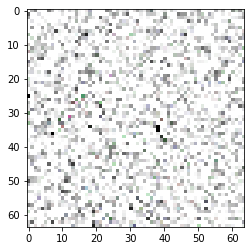

In [279]:
plt.imshow(pred.squeeze(0).permute(1,2,0).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


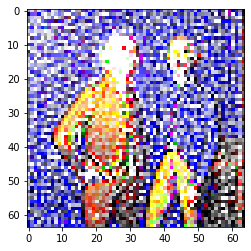

In [280]:
plt.imshow(latents.squeeze(0).permute(1,2,0).cpu().numpy())

In [281]:
with torch.no_grad():
    image = vae.decode(1 / 0.18215 * latents).sample

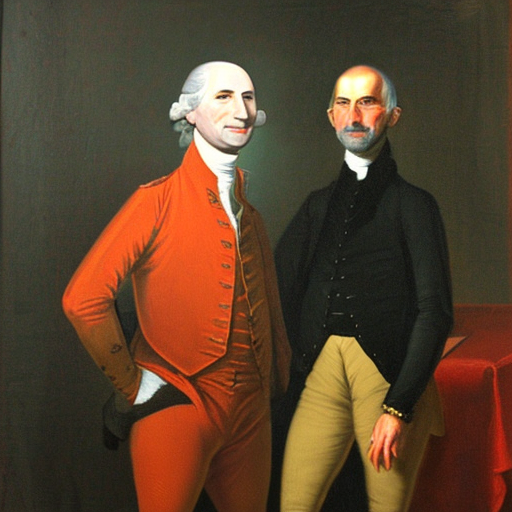

In [282]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image[0].detach().cpu().permute(1, 2, 0).numpy()
image = (image * 255).round().astype('uint8')
Image.fromarray(image)